In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('indian_liver_patient.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.isnull()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
578,False,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,False,False,False


In [5]:
def binary_encode(data, column, positive_value):
    data = data.copy()
    data[column] = data[column].apply(lambda x: 1 if x == positive_value else 0)
    return data

In [6]:
df = binary_encode(df, 'Gender', 'Male')

In [7]:
df = binary_encode(df, 'Dataset', 1)

In [8]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


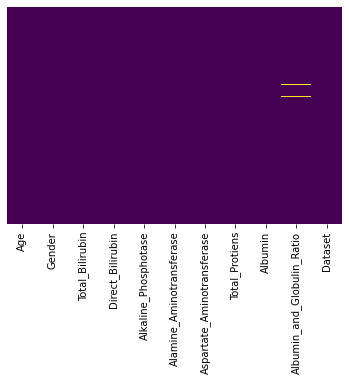

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [11]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

number of patients diagnosed with liver disease :  416
number of patients not diagnosed with liver disease :  167


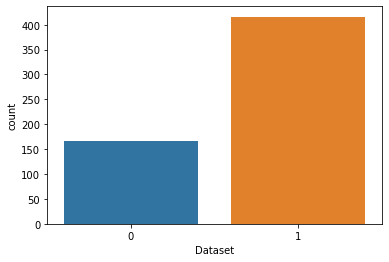

In [12]:
sns.countplot(data=df, x='Dataset')

LD, NLD = df['Dataset'].value_counts()
print('number of patients diagnosed with liver disease : ', LD)
print('number of patients not diagnosed with liver disease : ', NLD)

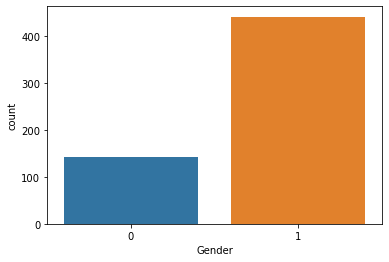

In [13]:
sns.countplot(data=df,x='Gender')

C:\Users\Neha S Hatti\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


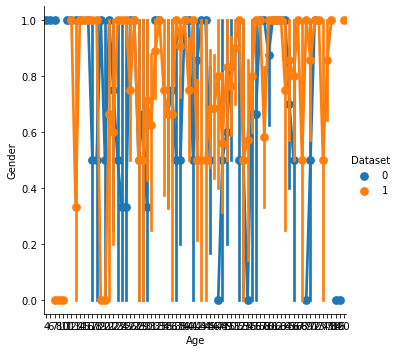

In [14]:
sns.factorplot(x="Age", y="Gender", hue="Dataset", data=df);

In [15]:
df[df["Albumin_and_Globulin_Ratio"].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,0,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,1,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,0,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,1,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [16]:
df["Albumin_and_Globulin_Ratio"]=df.Albumin_and_Globulin_Ratio.fillna(df["Albumin_and_Globulin_Ratio"].mean())

In [17]:
X=df.drop(["Gender","Dataset"],axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89


In [18]:
y=df["Dataset"]

In [19]:
df_corr=X.corr()

In [20]:
df_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000


Text(0.5, 1.0, 'correlation between variables')

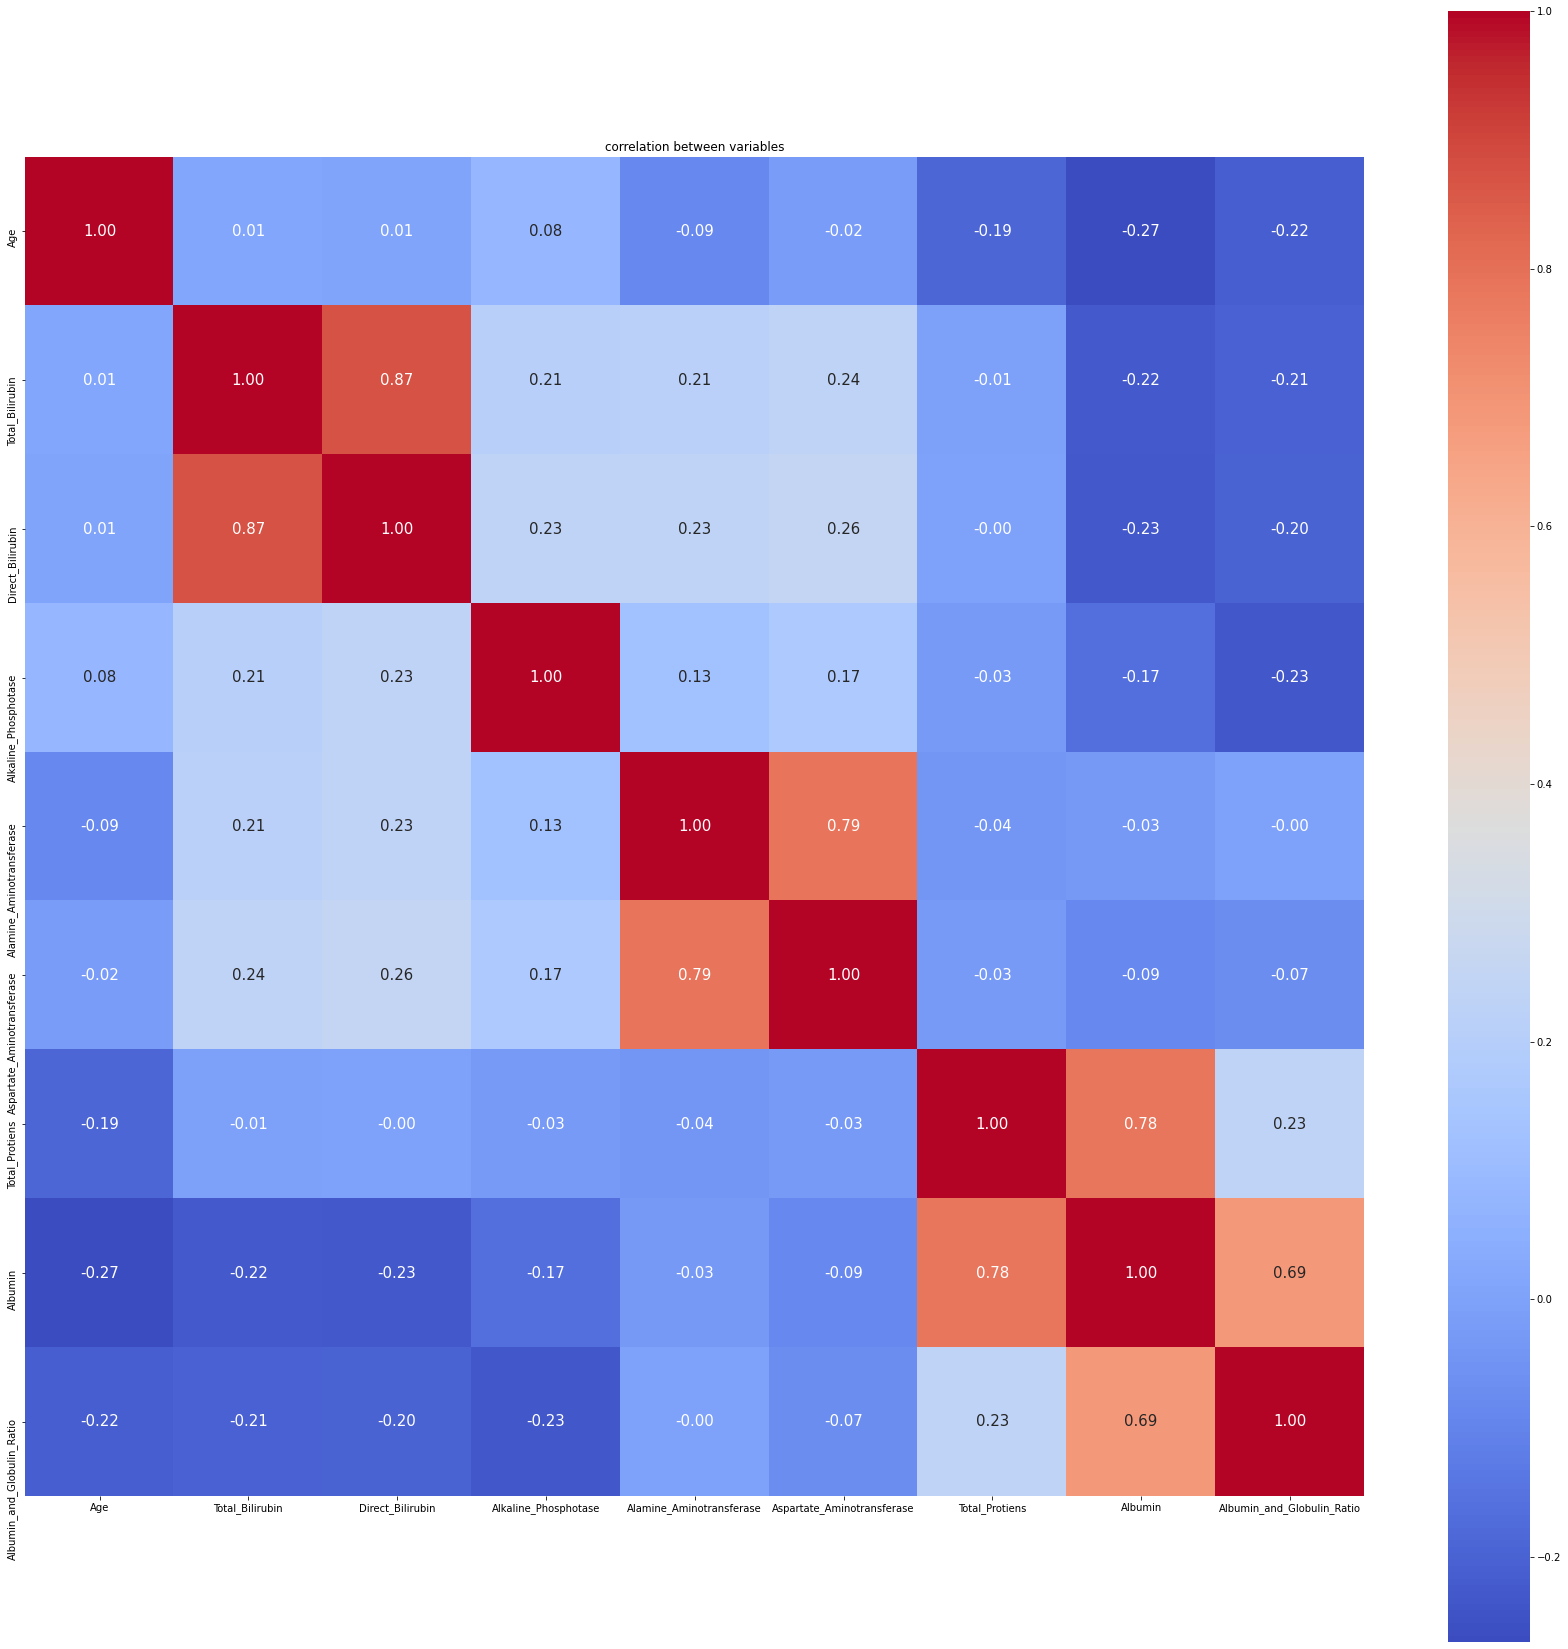

In [21]:
plt.figure(figsize=(30,30))
sns.heatmap(df_corr,cbar=True,square=True, annot=True,fmt=".2f",annot_kws={"size":15},
            cmap="coolwarm")

plt.title("correlation between variables")

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [23]:
df.drop("Dataset",axis=1).head

<bound method NDFrame.head of      Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       0              0.7               0.1                   187   
1     62       1             10.9               5.5                   699   
2     62       1              7.3               4.1                   490   
3     58       1              1.0               0.4                   182   
4     72       1              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60       1              0.5               0.1                   500   
579   40       1              0.6               0.1                    98   
580   52       1              0.8               0.2                   245   
581   31       1              1.3               0.5                   184   
582   38       1              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Amin

In [24]:
df["Dataset"].head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(408, 9)
(408,)
(175, 9)
(175,)


In [26]:
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Neha S Hatti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
Prediction=logmodel.predict(X_test)

In [28]:
accuracy=confusion_matrix(y_test,Prediction)

In [29]:
accuracy

array([[ 12,  39],
       [ 13, 111]], dtype=int64)

In [30]:
accuracy=accuracy_score(y_test,Prediction)
accuracy

0.7028571428571428

In [31]:
Prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [32]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
classifier=KNeighborsClassifier(n_neighbors=5)

In [35]:
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
classifier.score(X_train,y_train)

0.7843137254901961

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
classifier=KNeighborsClassifier(n_neighbors=5)

In [39]:
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [40]:
classifier.score(X_train,y_train)

0.7843137254901961

In [41]:
patient1=X_train

In [42]:
classifier.predict(patient1)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [43]:
X_test.head(583)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
228,65,1.0,0.3,202,26,13,5.3,2.6,0.90
128,58,1.7,0.8,1896,61,83,8.0,3.9,0.95
429,73,1.9,0.7,1750,102,141,5.5,2.0,0.50
141,66,4.2,2.1,159,15,30,7.1,2.2,0.40
308,45,0.8,0.2,165,22,18,8.2,4.1,1.00
...,...,...,...,...,...,...,...,...,...
224,70,1.7,0.5,400,56,44,5.7,3.1,1.10
464,45,0.7,0.2,164,21,53,4.5,1.4,0.45
568,20,16.7,8.4,200,91,101,6.9,3.5,1.02
387,51,0.8,0.2,160,34,20,6.9,3.7,1.10


In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
classifier = DecisionTreeClassifier(criterion="gini")
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
classifier.score(X_test,y_test)

0.6628571428571428

In [47]:
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
classifier.score(X_train,y_train)

1.0

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [50]:
sc.fit(X_train)

StandardScaler()

In [51]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [52]:
classifier_sc = DecisionTreeClassifier(criterion="gini")
classifier_sc.fit(X_train_sc,y_train)
classifier_sc.fit(X_test_sc,y_test)

DecisionTreeClassifier()

In [53]:
classifier_sc.score(X_test_sc,y_test)

1.0

In [54]:
classifier_sc.score(X_train_sc,y_train)

0.6372549019607843

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
classifier.score(X_test,y_test)

0.6971428571428572

In [58]:
classifier.score(X_train,y_train)

1.0

In [59]:
classifier=RandomForestClassifier(n_estimators=2,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=2)

In [60]:
classifier.score(X_test,y_test)

0.7028571428571428

In [61]:
classifier.score(X_train,y_train)

0.8382352941176471

In [62]:
adamodel = AdaBoostClassifier(n_estimators=100,
                             learning_rate=1)

In [63]:

model = adamodel.fit(X_train,y_train)

In [64]:
y_perd = model.predict(X_test)

In [65]:
y_perd

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [66]:
model.score(X_test,y_perd)

1.0

In [67]:
model.score(X_train,y_train)

0.8848039215686274

In [68]:
mylogregmodel = LogisticRegression()
adabc = AdaBoostClassifier(n_estimators=50 , base_estimator=mylogregmodel ,learning_rate=1)

In [69]:
model = adabc.fit(X_train,y_train)
y_perd = model.predict(X_test)

C:\Users\Neha S Hatti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Neha S Hatti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [70]:
model.score(X_test,y_perd)

1.0

In [71]:
model.score(X_train,y_train)

0.7377450980392157

In [72]:

!pip3 install lightgbm

You should consider upgrading via the 'c:\users\neha s hatti\anaconda3\python.exe -m pip install --upgrade pip' command.


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train , X_test , y_train , y_test = train_test_split (df , y , test_size = 0.2 , random_state = 123)

In [75]:
from sklearn.model_selection import train_test_split
import lightgbm 
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as plt


In [76]:
train_set = lightgbm.Dataset(X_train, y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)

In [77]:
params ={'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1
             }

In [78]:
lgbm_model = lightgbm.train(params,
                           train_set,
                           valid_sets=test_data,
                           num_boost_round=5000,
                           early_stopping_rounds=50)

[1]	valid_0's auc: 1
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 1
[3]	valid_0's auc: 0.987162
[4]	valid_0's auc: 1
[5]	valid_0's auc: 0.996284
[6]	valid_0's auc: 1
[7]	valid_0's auc: 1
[8]	valid_0's auc: 1
[9]	valid_0's auc: 1
[10]	valid_0's auc: 1
[11]	valid_0's auc: 1
[12]	valid_0's auc: 1
[13]	valid_0's auc: 1
[14]	valid_0's auc: 1
[15]	valid_0's auc: 1
[16]	valid_0's auc: 1
[17]	valid_0's auc: 1
[18]	valid_0's auc: 1
[19]	valid_0's auc: 1
[20]	valid_0's auc: 1
[21]	valid_0's auc: 1
[22]	valid_0's auc: 1
[23]	valid_0's auc: 1
[24]	valid_0's auc: 1
[25]	valid_0's auc: 1
[26]	valid_0's auc: 1
[27]	valid_0's auc: 1
[28]	valid_0's auc: 1
[29]	valid_0's auc: 1
[30]	valid_0's auc: 1
[31]	valid_0's auc: 1
[32]	valid_0's auc: 1
[33]	valid_0's auc: 1
[34]	valid_0's auc: 1
[35]	valid_0's auc: 1
[36]	valid_0's auc: 1
[37]	valid_0's auc: 1
[38]	valid_0's auc: 1
[39]	valid_0's auc: 1
[40]	valid_0's auc: 1
[41]	valid_0's auc: 1
[42]	valid_0's auc: 1
[43]	valid

In [79]:
y_train_pred = lgbm_model.predict(X_train)
y_test_pred = lgbm_model.predict(X_test)

In [80]:
print("AUC Train: {:.4f}\nAUC Test: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_test, y_test_pred)))


AUC Train: 1.0000
AUC Test: 1.0000


In [81]:
X_train,X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((466, 10), (117, 10), (466,), (117,))

In [82]:
train_data = lightgbm.Dataset(X_train, label=y_train)
valid_data = lightgbm.Dataset(X_valid, label=y_valid)

In [83]:
parameters = {'objective': 'binary',
              'metric': 'auc',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1
             }


In [84]:
model_lgbm = lightgbm.train(parameters,
                          train_set=train_data,
                           valid_sets=valid_data,
                           num_boost_round=5000,
                           early_stopping_rounds=50)

[1]	valid_0's auc: 0.704215
Training until validation scores don't improve for 50 rounds
[2]	valid_0's auc: 0.736398
[3]	valid_0's auc: 0.727778
[4]	valid_0's auc: 0.725287
[5]	valid_0's auc: 0.747701
[6]	valid_0's auc: 0.739272
[7]	valid_0's auc: 0.744636
[8]	valid_0's auc: 0.751724
[9]	valid_0's auc: 0.761111
[10]	valid_0's auc: 0.759195
[11]	valid_0's auc: 0.756897
[12]	valid_0's auc: 0.760536
[13]	valid_0's auc: 0.755556
[14]	valid_0's auc: 0.759962
[15]	valid_0's auc: 0.76954
[16]	valid_0's auc: 0.764559
[17]	valid_0's auc: 0.766475
[18]	valid_0's auc: 0.766858
[19]	valid_0's auc: 0.767241
[20]	valid_0's auc: 0.769157
[21]	valid_0's auc: 0.774521
[22]	valid_0's auc: 0.776054
[23]	valid_0's auc: 0.774138
[24]	valid_0's auc: 0.779119
[25]	valid_0's auc: 0.783716
[26]	valid_0's auc: 0.784866
[27]	valid_0's auc: 0.787165
[28]	valid_0's auc: 0.789464
[29]	valid_0's auc: 0.791762
[30]	valid_0's auc: 0.789847
[31]	valid_0's auc: 0.792912
[32]	valid_0's auc: 0.792912
[33]	valid_0's auc: 0

In [85]:
y_train_pred = model_lgbm.predict(X_train)
y_valid_pred = model_lgbm.predict(X_valid)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.8608
AUC Valid: 0.8398


In [86]:
!pip3 install xgboost 

You should consider upgrading via the 'c:\users\neha s hatti\anaconda3\python.exe -m pip install --upgrade pip' command.


In [87]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [88]:
model = XGBClassifier()
model.fit(X_train,y_train)

C:\Users\Neha S Hatti\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
model.score(X_train,y_train)

1.0

In [90]:
from sklearn.neural_network import MLPClassifier

In [91]:
mlp = MLPClassifier(hidden_layer_sizes=(3,2),max_iter=500,activation="relu")
mlp

MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=500)

In [92]:
ss = mlp.fit(X_train,y_train)

In [93]:
ss.score(X_train,y_train)

0.721030042918455

In [94]:
oo = mlp.fit(X_train,y_train)

In [95]:
oo.score(X_train,y_train)

0.7060085836909872

In [96]:
##unsupervised algorithms 

In [97]:
print(dir(df))
print(df.target)

['Age', 'Alamine_Aminotransferase', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Alkaline_Phosphotase', 'Aspartate_Aminotransferase', 'Dataset', 'Direct_Bilirubin', 'Gender', 'T', 'Total_Bilirubin', 'Total_Protiens', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '

AttributeError: 'DataFrame' object has no attribute 'target'

In [98]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [99]:
df.drop(['Dataset'],axis=1)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [100]:
from sklearn.cluster import KMeans

In [101]:
model = KMeans(n_clusters=3)
model.fit(df.data)

AttributeError: 'DataFrame' object has no attribute 'data'